# Задача Промышленность
*Выпускной проект по специализации DataScience от Яндекс.Практикума*  
**Задача** - оптимизация второго "внепечного" этапа с помощью регулирования целевой температуры в ковше. Требуется создать модель регрессии предсказывающую температуру на выходе с технологического процесса.     

*Процесс* "внепечного" этапа. В печи-ковше расплавленный металл продувается кислородом, инертными газами и иногда природным газов для выжегания примесей, достижения требуемого химического состава.  
Температуру измеряют: 
- перед первым добовлением легирующих добавок  
- после добавления, перемешивания и продувания сплава инертным газом  
Цикл повторяется до достижения целевых показателей состава.

Ключевым фактором является температура металла, который разливается в слябы.

# План  
Общий план работы:
1) Удаление вылетов в `data_temp` и `data_arc`  
2) Составление таблицы признаков и выделение целевых значений:  
- сводная таблица по `key` - группировка по этому признаку  
- выделение самых поздних замеров теемпиратуры в таблицу `target` и удаление их из данных. (получится series c `key` и `temp_target`)  
- К каждому `key` считается минимальная и максимальные температуры, разница во времени от певого до последнего замера, количество замеров температуры, суммарная затраченная энергия на нагрев дугой (сумма квадратных корней из суммы квадратов активной и реактивной мощностей), суммарный объём поданных сыпучих материалов и количетсво таких подач, суммарный объём проволочных материалов и количество таких подач, подача газа. (*возможно, модель можно попробовать дополнить булевыми значениями по каждой из составов*, но на первый взгляд это лишнее)  

3) Проверка на мультиколлинеарность факторов  
4) Разбиение на тренировочную и тестовую выборки, сравнение моделей осуществляется за счет кросс-валидации. 
5) Подбор гиперпараметров и типа модели.   
6) Сравнение с dummy-моделью - предсказывает ли наша лучше?  
7) Тренировка лучшей модели и проверка её на тестовой выборке с метрикой качества MAE.  
8) Если нужно переосмысление  
9) Подведение итогов, выделение наиболее значимых параметров. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-первчиный-анализ" data-toc-modified-id="Загрузка-данных-и-первчиный-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и первчиный анализ</a></span><ul class="toc-item"><li><span><a href="#Исследуем-данные" data-toc-modified-id="Исследуем-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Исследуем данные</a></span><ul class="toc-item"><li><span><a href="#Пропуски-и-вылеты" data-toc-modified-id="Пропуски-и-вылеты-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Пропуски и вылеты</a></span></li><li><span><a href="#Вариации-связанные-с-температурой" data-toc-modified-id="Вариации-связанные-с-температурой-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Вариации связанные с температурой</a></span></li><li><span><a href="#&quot;Жизненный-цикл&quot;-key" data-toc-modified-id="&quot;Жизненный-цикл&quot;-key-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>"Жизненный цикл" key</a></span></li></ul></li><li><span><a href="#Подитог-первичного-анализа-данных" data-toc-modified-id="Подитог-первичного-анализа-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подитог первичного анализа данных</a></span></li><li><span><a href="#Удаление-вылетов" data-toc-modified-id="Удаление-вылетов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаление вылетов</a></span></li></ul></li><li><span><a href="#Составление-сводной-таблицы" data-toc-modified-id="Составление-сводной-таблицы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Составление сводной таблицы</a></span><ul class="toc-item"><li><span><a href="#Описание-таблицы" data-toc-modified-id="Описание-таблицы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описание таблицы</a></span></li><li><span><a href="#Рассмотрение-типа-распределения" data-toc-modified-id="Рассмотрение-типа-распределения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рассмотрение типа распределения</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li><li><span><a href="#Разделение-на-train-&amp;-test" data-toc-modified-id="Разделение-на-train-&amp;-test-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разделение на train &amp; test</a></span></li><li><span><a href="#Итоги-изучения-и-подготовления-данных" data-toc-modified-id="Итоги-изучения-и-подготовления-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Итоги изучения и подготовления данных</a></span></li></ul></li><li><span><a href="#Обучение-моделией" data-toc-modified-id="Обучение-моделией-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделией</a></span><ul class="toc-item"><li><span><a href="#Dummy-regressor" data-toc-modified-id="Dummy-regressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummy-regressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#Подитог-обучения-моделей" data-toc-modified-id="Подитог-обучения-моделей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подитог обучения моделей</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Важность-параметров" data-toc-modified-id="Важность-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Важность параметров</a></span></li></ul></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчёт</a></span><ul class="toc-item"><li><span><a href="#Аннотация" data-toc-modified-id="Аннотация-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Аннотация</a></span></li><li><span><a href="#Введение" data-toc-modified-id="Введение-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Данные</a></span></li><li><span><a href="#Признаки" data-toc-modified-id="Признаки-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Признаки</a></span><ul class="toc-item"><li><span><a href="#Производственный-цикл" data-toc-modified-id="Производственный-цикл-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Производственный цикл</a></span></li><li><span><a href="#Диапозоны-температур" data-toc-modified-id="Диапозоны-температур-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Диапозоны температур</a></span></li><li><span><a href="#Таблица-параметров" data-toc-modified-id="Таблица-параметров-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>Таблица параметров</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-6.4.4"><span class="toc-item-num">6.4.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Думми-модель" data-toc-modified-id="Думми-модель-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Думми-модель</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.5.4"><span class="toc-item-num">6.5.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Финальная-модель" data-toc-modified-id="Финальная-модель-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Финальная модель</a></span></li><li><span><a href="#Вывод--&amp;-ответы-на-ноушен" data-toc-modified-id="Вывод--&amp;-ответы-на-ноушен-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Вывод  &amp; ответы на ноушен</a></span></li></ul></li></ul></div>

## Загрузка данных и первчиный анализ  
- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).  
Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key: они соответствуют разным итерациям обработки.

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import scipy.stats
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [2]:
file_path = '/datasets/final_steel/' # для загрузки с интерфеса яндекса
#file_path = 'C:\\Users\\Maria Smirnova\\Desktop\\final_project\\final_steel\\final_steel\\'
dfs = {}
for root, dirs, files in os.walk(file_path):
    for name in files:
        if (name == '.DS_Store'): 
            pass
        else:
            title = re.sub('.csv', '', name) 
            title = re.sub('data', 'df', title) # приводим названия всех данных к типу df_name
            dfs[title] = pd.read_csv(file_path+name)
print(dfs.keys())

dict_keys(['df_gas', 'df_bulk', 'df_bulk_time', 'df_wire_time', 'df_arc', 'df_temp', 'df_wire'])


### Исследуем данные    
#### Пропуски и вылеты
Нас интересуют:   
- типы данных  
- их количетсво    
- количество вылетов (в данном случае важно просмотреть таблицы `df_arc`, `df_gas`, `df_temp`, в том числе распределение данных)  
- дубликаты

Структура данных такова, что пропусков в данных много - однако, они в таблицах `df_bulk`, `df_bulk_time`, `df_wire`, `df_wire_time`  означают отсутствие этого компонента.    
Для индикации таких случаев реализована функция `prepate_data` - в ней есть возможность удаления пустых значений при определенном значении % пропусков. Однако, в указанных таблицах пропуски будут заменяться на нули. В таблицах `df_arc`, `df_gas`, `df_temp` будут рассмотрены отдельно.

In [3]:
def prepare_data(df, trh, df_name):
    main_tables = ['df_arc', 'df_gas', 'df_temp']
    supp_tables = ['df_bulk', 'df_bulk_time', 'df_wire', 'df_wire_time']
    if (df_name in main_tables):
        return main_prepare_data(df, trh)
    else:
        return supp_prepare_data(df, trh)

def main_prepare_data(df, trh):
    """
    main_prepare_data(df, trh)
    Удаляет дубликаты, выводит предупреждение о большом количестве пропусков,
    выводит предупреждение о вылете в случае q_3+ 1.5*irq и q_2 - 3*irq, строит ящик с усами
    в случае не метрических данных выводит предупреждение    
    """
    df.drop_duplicates(inplace=True) # удаляем полные дубликаты
    for col in df:
        if (sum(df[col].isnull()) >= df.shape[0]*trh): # trh - обычно 0.01 = 1%
            print(f'В столбце {col} много пустых ячеек {sum(df[col].isnull())/df.shape[0]:.1%}')
        #else:
            #df.dropna(subset=[col], inplace=True)
        try:
            threshold_max = df[col].describe()['75%'] + 1.5*(-df[col].describe()['25%'] + df[col].describe()['50%'])
            max_dist = df[col].describe()['max']
            threshold_min = df[col].describe()['25%'] - 1.5*(-df[col].describe()['25%'] + df[col].describe()['50%'])
            min_dist = df[col].describe()['min']
            coef_threshold = 2
            if(col != 'key'):
                df.boxplot(column=[col])
                plt.show()
            if ((abs(max_dist) > abs(coef_threshold*threshold_max)) | (abs(min_dist) > abs(coef_threshold*threshold_min))):
                print(f'{col} может иметь вылет данных')
                display(df[col].describe())
        except:
            print(f'{col} is not numeric')
    return df

def supp_prepare_data(df, trh):
    """
    supp_prepare_data(df, trh)
    Удаляет дубликаты, заполняет пропуски нулями,
    в случае не метрических данных выводит предупреждение    
    """
    df.drop_duplicates(inplace=True) # удаляем полные дубликаты
    for col in df:
        try:
            df.fillna(value=0, inplace=True) # заполняем пропуски нулями, следуюет из логики данных
        except:
            print(f'{col} is not numeric')
    return df

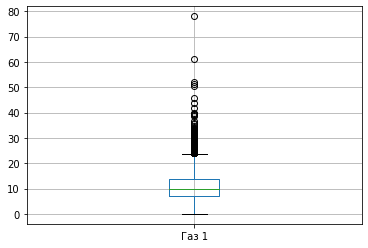

Газ 1 может иметь вылет данных


count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64

Начало нагрева дугой is not numeric
Конец нагрева дугой is not numeric


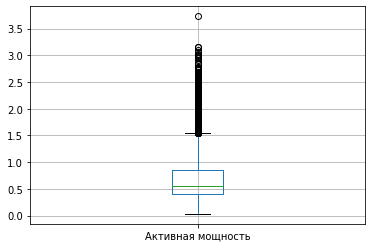

Активная мощность может иметь вылет данных


count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: Активная мощность, dtype: float64

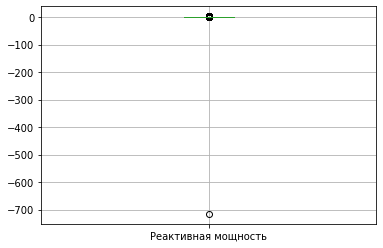

Реактивная мощность может иметь вылет данных


count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: Реактивная мощность, dtype: float64

Время замера is not numeric
В столбце Температура много пустых ячеек 18.2%


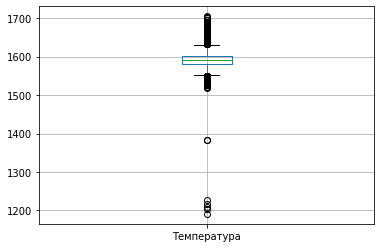

In [4]:
thr = 0.03 # не будем выводить данные о пропусках, если их в столбе меньше 3%
for i in dfs.keys():
    dfs[i] = prepare_data(dfs[i], thr, i)

Заметно, что явные вылеты есть в `реактивной мощности`, `температура`. По физическим соображениям реактивная мощность не может быть сильно отрицательно, температура не может быть меньше **1450**. Эти данные удаляются.    

Поскольку объектом изучения является ковш (индикатор `key`) удаляются все строки для этого ковша.  
Все ковши, которые представлены одним замером температуры - удаляются.    
Для фильтрации `key` подходящие под вышеуказанные условия записываются в переменную `key_to_delete`  
`df_gas` имеет вылеты, однако, оценить их влияние сложно - их можно будет удалить в случае надобности

In [5]:
dfs['df_temp'] = dfs['df_temp'].dropna() 
print("Значение key для вылета в df_arc", dfs['df_arc'].loc[dfs['df_arc']['Реактивная мощность'].idxmin()]['key']) # Значение key для вылета в df_arc
print("Значение index,key для вылетов в df_temp:",dfs['df_temp'].loc[dfs['df_temp']['Температура'] < 1450]['key'], sep='\n')
tmp = (dfs['df_temp']['key'].value_counts())
print("Количество key у которых только один замер: ", len(tmp.loc[tmp<2].index.to_list()))
print('Значения с вылетом по газу:', dfs['df_gas'].loc[dfs['df_gas']['Газ 1'] > 50]['key'].to_list())
key_to_delete = []
key_to_delete.append(dfs['df_arc'].loc[dfs['df_arc']['Реактивная мощность'].idxmin()]['key'])
key_to_delete.extend(tmp.loc[tmp<2].index.to_list())
key_to_delete.extend(dfs['df_temp'].loc[dfs['df_temp']['Температура'] < 1450]['key'].to_list())
key_to_delete.extend(dfs['df_gas'].loc[dfs['df_gas']['Газ 1'] > 50]['key'].to_list())

Значение key для вылета в df_arc 2116
Значение index,key для вылетов в df_temp:
4350      867
5978     1214
7958     1619
8913     1818
8914     1818
10127    2052
12564    2561
Name: key, dtype: int64
Количество key у которых только один замер:  741
Значения с вылетом по газу: [117, 280, 322, 2110, 2570]


#### Вариации связанные с температурой
`df_temp` имеет данные об измеренных температурах. В ней есть большое количество пропусков значений температур.     
Распределение температур и количество замеров:

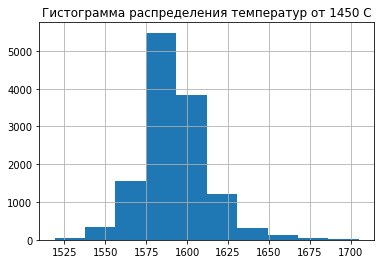

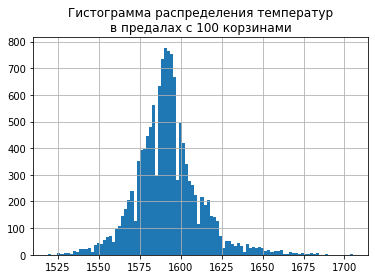

В среднем для ковша  4.0 измерений температуры


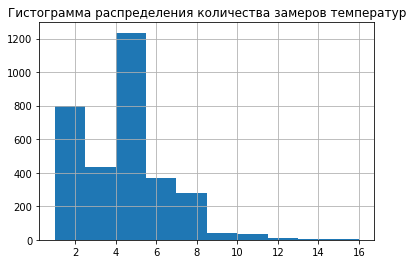

In [6]:
df_temp = dfs['df_temp']
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])
df_temp[(df_temp['Температура']> 1450)]['Температура'].hist()
plt.title('Гистограмма распределения температур от 1450 C')
plt.show()
df_temp[(df_temp['Температура']> 1450)]['Температура'].hist(bins=100)
plt.title('Гистограмма распределения температур' + '\n' + 'в предалах с 100 корзинами')
plt.show()
print(f"В среднем для ковша {df_temp.groupby(['key']).count()['Температура'].mean(): .1f} измерений температуры")
df_temp.groupby(['key']).count()['Температура'].hist()
plt.title('Гистограмма распределения количества замеров температур')
plt.show()

По гистограмме температур сложно сказать, является ли распределение нормальным, а соответсвтенно, сложно сказать о вылетах в данных. Нужно провести статестический тест.   
В случае ненормального распределения температур вышеобозначенные статестические критерии выбросов не применимы.  

Рассмотрим взаимоотношение начальной и конечной температур <a id='diff_tech'></a>:

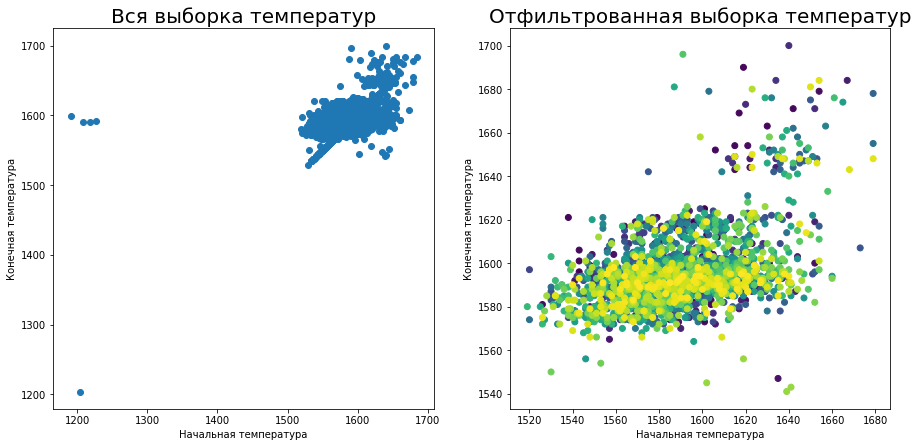

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

tmp = dfs['df_temp'] 
ax1.scatter(tmp.groupby('key').first()['Температура'],tmp.groupby('key').last()['Температура'])
ax1.set_title('Вся выборка температур', fontsize=20)
ax1.set(xlabel='Начальная температура', ylabel='Конечная температура')

tmp = tmp[~tmp['key'].isin(key_to_delete)]

tmp = tmp[tmp['Температура'] > 1440]
ax2.scatter(tmp.groupby('key').first()['Температура'],tmp.groupby('key').last()['Температура'], c=tmp.groupby('key').first().index)
ax2.set_title('Отфильтрованная выборка температур', fontsize=20)
ax2.set(xlabel='Начальная температура', ylabel='Конечная температура')
plt.show()

Заметно, что большая часть "истинных" температур лежит в промежутке между 1560 и 1640 градусов. Второй большой кластер находится между 1640 и 1700 градусов. Инетерсно, что Во втором кластере начальные температуры существенно выше, конечных - это может говорить о **существенно другом технологическом процессе**.    
Интересно, так же, что облако не семметрично и существенно больше растянуто по начальным температурам - возможно, предыдущий технологический процесс имеет большой разброс. 

#### "Жизненный цикл" key  
Функция создания датафрема для отоброжения событый с ковшом. 

In [8]:
df_arc = dfs['df_arc']
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'])
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'])
df_temp = dfs['df_temp']
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])

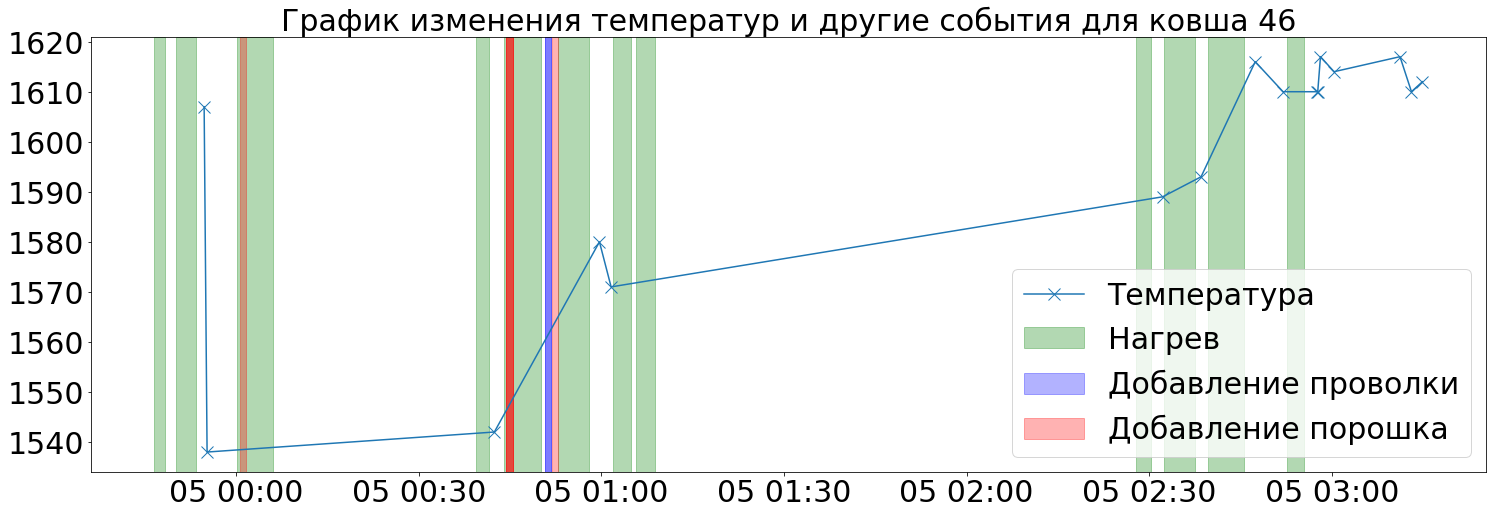

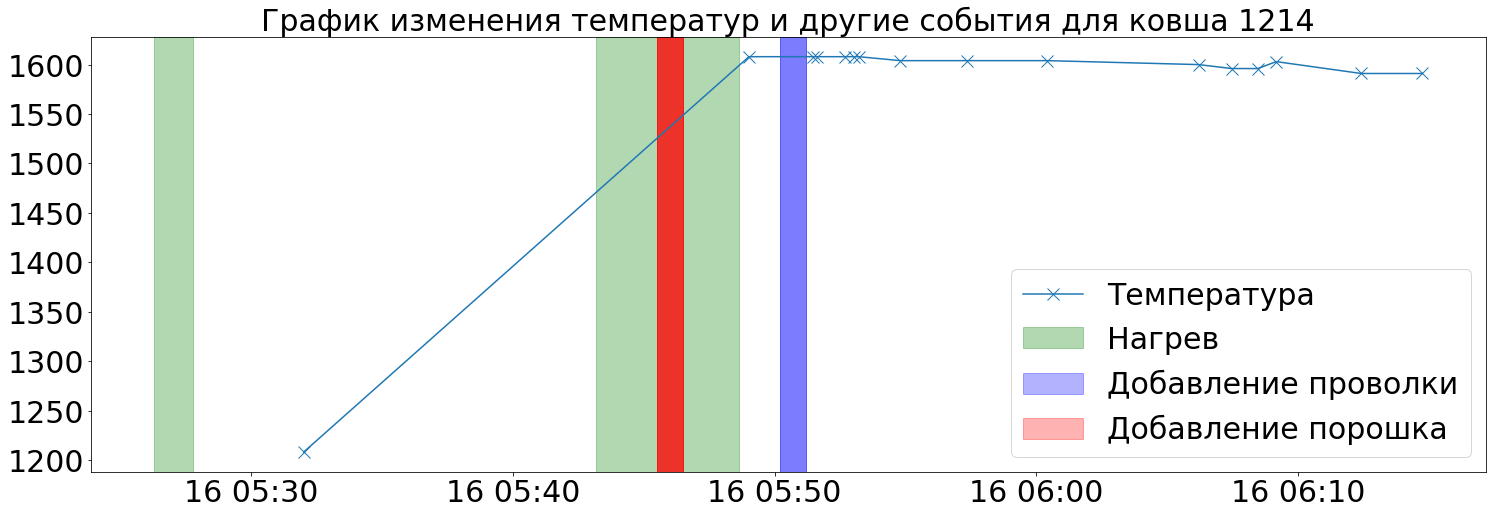

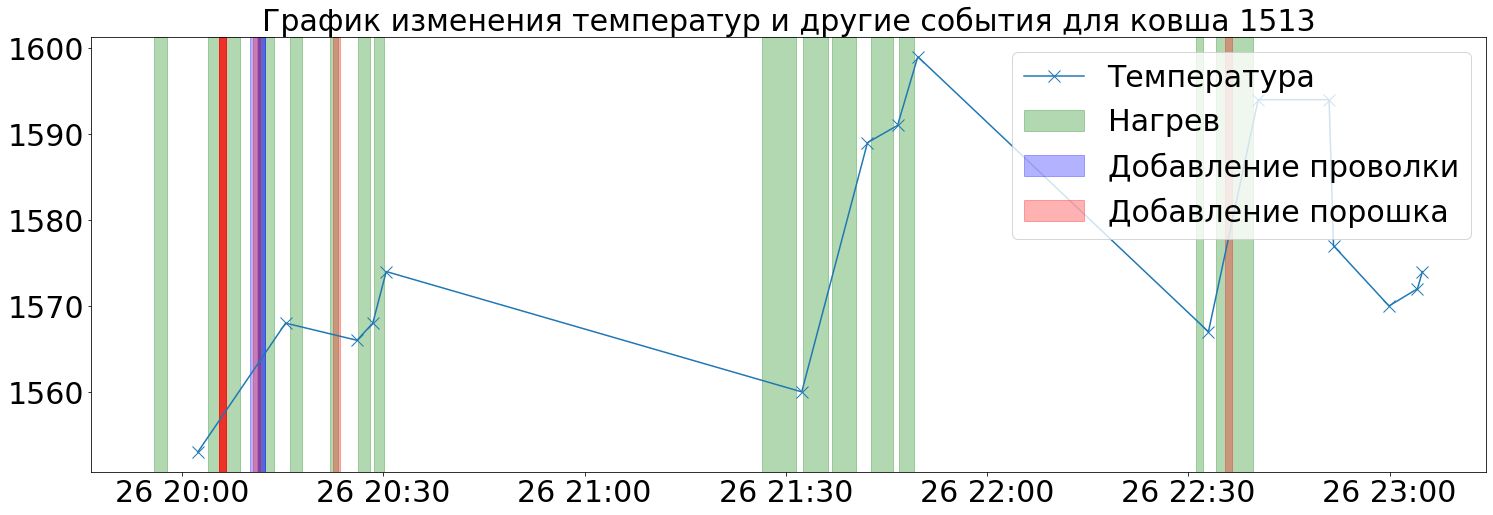

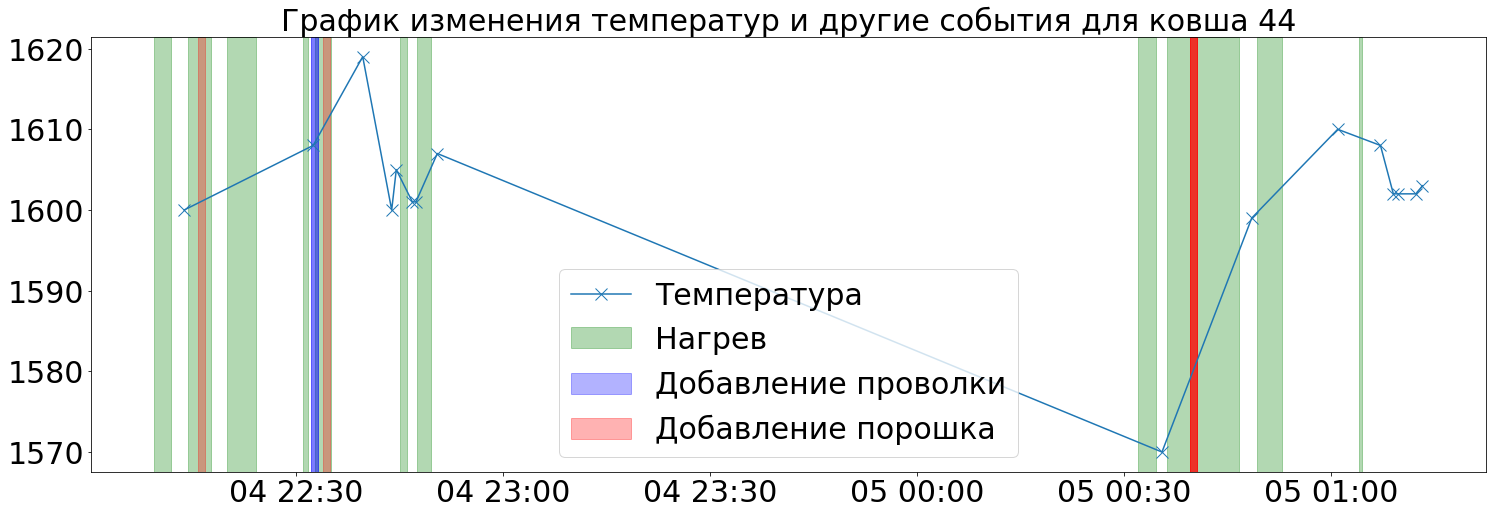

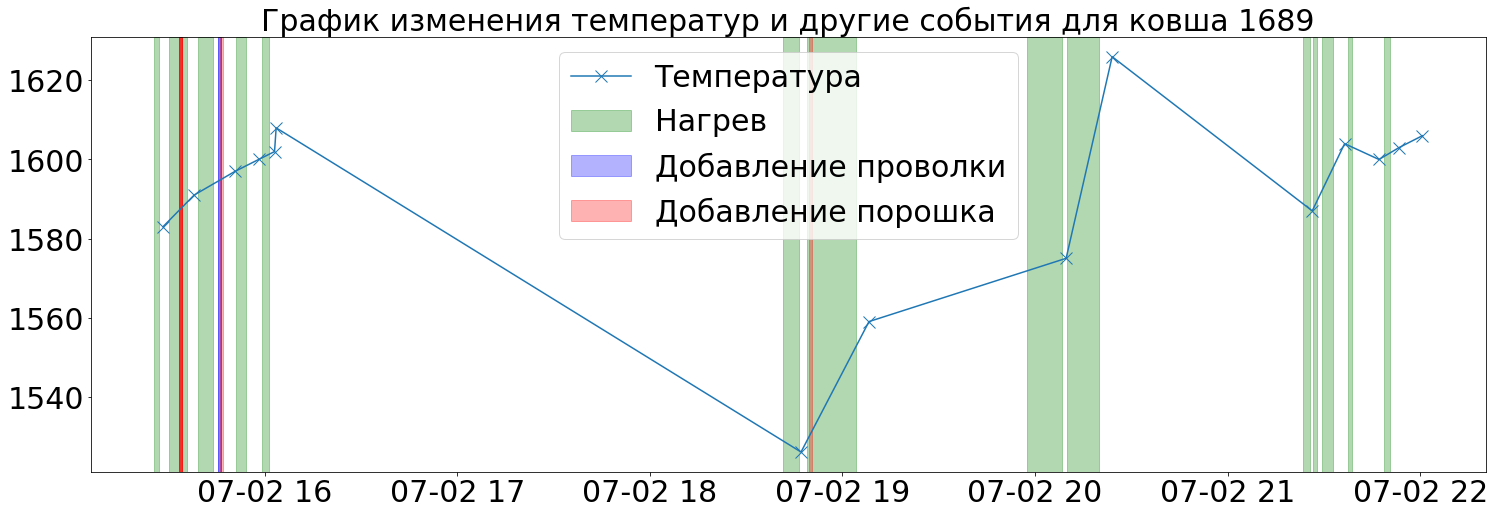

In [9]:
import warnings
warnings.filterwarnings('ignore')

df_arc = dfs['df_arc']
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'])
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'])
df_temp = dfs['df_temp']
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])


key_of_interest = [46, 1214, 1513, 44, 1689]
for toi in key_of_interest:
    fig, ax = plt.subplots(figsize=(25, 8)) # задаём параметры графика
    ax.plot(df_temp[df_temp['key']==toi]['Время замера'], df_temp[df_temp['key']==toi]['Температура'], marker='x', markersize=12, label='Температура')
    heating_start = df_arc[df_arc['key']==toi]['Начало нагрева дугой'].to_list()
    heating_stop = df_arc[df_arc['key']==toi]['Конец нагрева дугой'].to_list()
    try:
        for i in range(len(heating_start)-2):
            ax.axvspan(heating_start[i], heating_stop[i], alpha=0.3, color="green")
        i +=1
        ax.axvspan(heating_start[i], heating_stop[i], alpha=0.3, color="green", label = 'Нагрев') #костыль для отображения легенды
        wire = dfs['df_wire_time'].loc[(dfs['df_wire_time']['key']== toi)]
        wire.drop('key', axis=1, inplace=True)
        wire_list = wire.values.tolist()[0]
        for i in wire_list:
            if i != 0:
                i = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
                ax.axvspan(i, i +  timedelta(minutes=1), alpha=0.3, color="blue")
                label_tmp = i
        ax.axvspan(label_tmp , label_tmp +  timedelta(minutes=1), alpha=0.3, color="blue", label='Добавление проволки') # костыль для отображения легенды
    except:
        pass
    try:
        bulk = dfs['df_bulk_time'].loc[(dfs['df_bulk_time']['key']== toi)]
        bulk.drop('key', axis=1, inplace=True)
        bulk_list = bulk.values.tolist()[0] 
        for i in bulk_list:
            if i != 0:
                i = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
                ax.axvspan(i, i +  timedelta(minutes=1), alpha=0.3, color="red" )
                label_tmp = i
        ax.axvspan(label_tmp, label_tmp +  timedelta(minutes=1), alpha=0.3, color="red", label='Добавление порошка' ) # костыль для отображения легенды
    except:
        pass
    plt.legend(fontsize=30)
    plt.title('График изменения температур и другие события для ковша ' + str(toi), fontdict = {'fontsize' : 30})
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
warnings.filterwarnings("default")

Заметно, что температура не сильно зависит от других технологическиех процессов. Так же ковш `1214` показывает несостоятельность данных в случае замера температуры до 1450 - первоначальная температура зафиксировано либо не верно, либо до начала плавления.

### Подитог первичного анализа данных   
*На данных возможно обучить модель. Высокая вероятность успешного обучения*. 

Очевидно, что данные температуре представляют два разных технологических процесса - кластеры видны на рисунках. Для более маленького класстера требуется дополнитлеьное количество данных и дообучение модели. 
Данные представляют несколько таблиц, в которых фиксируются результаты разных процессов во время плавки металла.   
Целевой показатель - последняя замеренная температура перед отливкой. При этом, количество замеров может колебаться от 1 до 16. Всего имеются данные по 3216 ковшам, при этом не все из них предоставлены в таблицах с процессами.   
Распределение температур и времени от первого до последнего измрения выглядят нормальными.  
Заметно, что проволку добавляют, как правило, в начале процесса, порошки схожи, однако городо чаще встречаются в середине процесса.  
Добавления присадок к металлу влияет на температуру только до следующего прогрева. 

### Удаление вылетов  
Данные с `key` из `key_to_delete` удаляются из таблицы `df_temp`

In [10]:
print('Количество строк в датафрейме до удаления',len(df_temp))
df_temp = df_temp[~df_temp['key'].isin(key_to_delete)]
print('Количество строк в датафрейме после удаления', len(df_temp))

Количество строк в датафрейме до удаления 13006
Количество строк в датафрейме после удаления 12182


## Составление сводной таблицы  
### Описание таблицы 
Таблица будет сводной по значению `key` с параметрами:  
- индентификатор ковша `key`
- температура, замеренная последней (целевой показатель)
- температура, замеренная первой  
- суммарная мощность затраченная на разогрев (сумма квадратных корней из суммы квадратов активной и реактивной мощностей)  
- количество итераций прогрева  
- сумма добавленных сыпучих материалов  
- количество итераций добавления сыпучих  
- сумма добавленной массы проволоки  
- количество итераций добавления проволоки  
- подача газа  
Все названия колонок приводим к snake_type и более удобным названиям.  

*Считается, что данные по ковшу можно анализировать, если для него есть первое и последнее измерение.*

В результате будут полученны:  
`df`- основная таблица со всеми данными, без пропусков данных  

In [11]:
df_temp = df_temp.sort_values(['key', 'Время замера']) # отсортируем данные
df = df_temp.groupby('key').last('Температура').join(df_temp.groupby('key').first('Температура'), 
                                                     rsuffix='_first')
# присоединяем данные о мощности нагрева
df_arc['total_power'] = (df_arc['Активная мощность']**2 + 
                         df_arc['Реактивная мощность']**2)**0.5 # рассчитывам затраченную энергию для нагрева
df = df.join(df_arc.groupby('key').sum('total_power')['total_power']) # добовляем столбцы по мощности с методом left
df = df.join(df_arc.groupby('key').count()['total_power'], rsuffix='_count') # добавляем столбец по количеству замеров

# присоединяем данные о сыпучих материалах
df_bulk = dfs['df_bulk']
try:
    df_bulk.drop(['sum_bulk', 'num_bulk'], axis=1, inplace=True) # ограничитель при повторном запуске кода
except:
    pass
df_bulk['sum_bulk'] = df_bulk.drop('key', axis=1).sum(axis=1) # суммируем все добавленные порошки
df_bulk['num_bulk'] = df_bulk[df_bulk>0].notnull().sum(axis=1)-2 #считаем количество добавлений (-2) вычитаем столбцы key & sum_bulk
df = df.join(df_bulk.groupby('key').sum()[['sum_bulk', 'num_bulk']]) # добавляем столбец по количеству замеров

# присоединяем данные о проволоках
df_wire = dfs['df_wire']
try:
    df_wire.drop(['sum_wire', 'num_wire'], axis=1, inplace=True) # ограничитель при повторном запуске кода
except:
    pass
df_wire['sum_wire'] = df_wire.drop('key', axis=1).sum(axis=1) # суммируем все добавленные проволоки
df_wire['num_wire'] = df_wire[df_wire>0].notnull().sum(axis=1)-2 #считаем количество добавлений (-2) вычитаем столбцы key & sum_wire
df = df.join(df_wire.groupby('key').sum()[['sum_wire', 'num_wire']]) # добавляем столбец по количеству замеров

# добавляем данные по газу
df_gas = dfs['df_gas']
df = df.join(df_gas.groupby('key').sum())

df = df.rename(columns={'Температура' : 'target_temp', 
                        'Температура_first' : 'first_temp', 
                        'total_power_count' : 'num_heating', 'Газ 1' : 'gas' })
df = df.dropna()

display(df)

,target_temp,first_temp,total_power,num_heating,sum_bulk,num_bulk,sum_wire,num_wire,gas
key,,,,,,,,,
1,1613.0,1571.0,5.826395,5,553.0,4.0,60.059998,1.0,29.749986
2,1602.0,1581.0,3.649216,4,582.0,4.0,96.052315,1.0,12.555561
3,1599.0,1596.0,2.989534,5,544.0,4.0,91.160157,1.0,28.554793
4,1625.0,1601.0,3.814962,4,595.0,4.0,89.063515,1.0,18.841219
5,1602.0,1576.0,4.035758,4,584.0,4.0,98.352796,2.0,5.413692
...,...,...,...,...,...,...,...,...,...
2495,1591.0,1570.0,3.986869,4,719.0,5.0,89.150879,1.0,7.125735
2496,1591.0,1554.0,5.057033,6,796.0,5.0,114.179527,1.0,9.412616
2497,1589.0,1571.0,2.885017,3,665.0,4.0,103.134723,2.0,6.271699


### Рассмотрение типа распределения  
Чтобы верно определить вылеты и мультиколлениарность нужно выявить распределены ли признаки нормально.  
Визуализация:

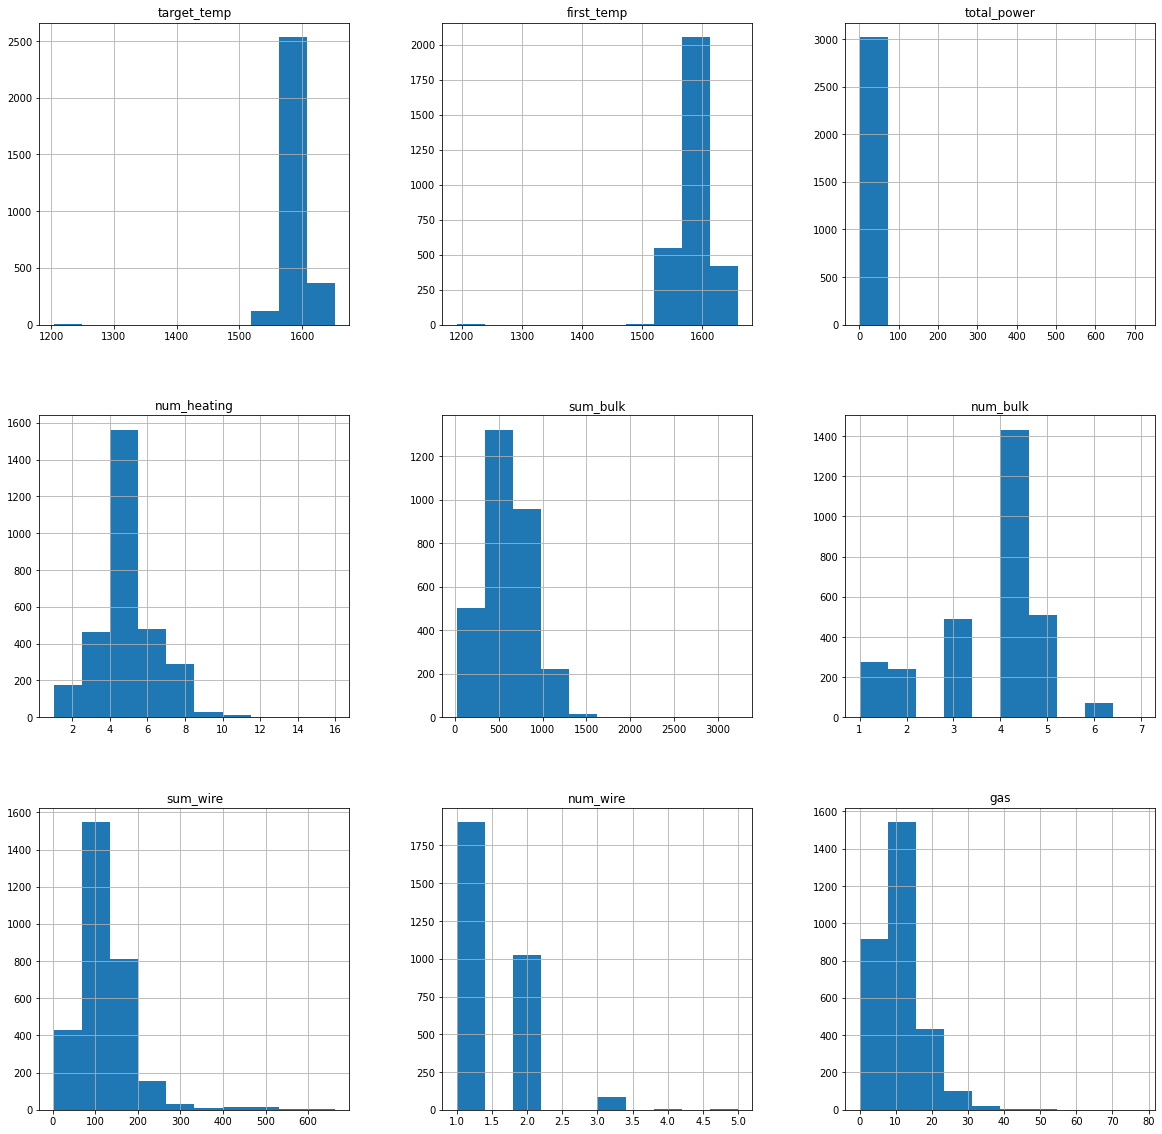

In [43]:
df.hist(figsize=(20,20));

Посмотрим на результаты статестического теста:

In [14]:
print('Проверка на нормальность распределения')
for col in df:
    f, p = scipy.stats.kstest(df[col], 'norm')
    if (p > 0.05):
        print("- Распределение", col, "близко к нормальному")
    else:
        print("- Распределение", col, "НЕ близко к нормальному")

Проверка на нормальность распределения
- Распределение target_temp НЕ близко к нормальному
- Распределение first_temp НЕ близко к нормальному
- Распределение total_power НЕ близко к нормальному
- Распределение num_heating НЕ близко к нормальному
- Распределение sum_bulk НЕ близко к нормальному
- Распределение num_bulk НЕ близко к нормальному
- Распределение sum_wire НЕ близко к нормальному
- Распределение num_wire НЕ близко к нормальному
- Распределение gas НЕ близко к нормальному


### Проверка на мультиколлинеарность  
Для улучшения качества моделей данные проверяю на корреляцию друг с другом, чтобы исключить коррелирующие столбцы.
Для такой проверки используется функция is_corr - которая возвращает: 0 - если гипотеза о корреляции не подтверждена и 1 - если подтверждена. Порог значимой корреляции взят за 0.9  
В функции не проверяется корреляции с целевым значением `temp`.    

Карта корреляций поможет найти столбцы, которые негативно влияют на метрику модели

Корреляция наблюдается в 0 парах столбцов


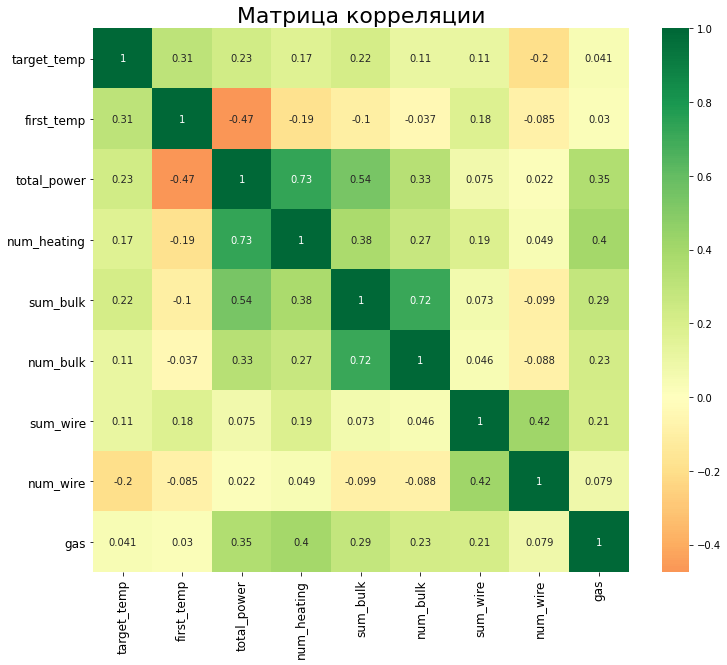

In [15]:
def is_corr (s1, s2):
    #scipy.stats.spearmanr
    #corr = s1.corr(s2)
    corr = scipy.stats.spearmanr(s1, s2)
    if corr.pvalue > 0.90:
        return 1
    else:
        return 0

counter = 0
for col in df.drop(['target_temp'], axis=1):
    for col_2 in df.drop(['target_temp'], axis=1):
        if col == col_2:
            break
        if (is_corr(df[col], df[col_2]) == 1):
            print('Наблюдается корреляция между:', col, '&' , col_2)
            counter +=1
print('Корреляция наблюдается в', counter, 'парах столбцов')
spearman_corr = []
for col in df.drop(['target_temp'], axis=1):
    row = []
    for col_2 in df.drop(['target_temp'], axis=1):
        row.append(scipy.stats.spearmanr(col, col_2))
    spearman_corr.append(row)

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='spearman'), xticklabels=df.corr(method='spearman').columns, yticklabels=df.corr().columns, \
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Абсолютно логично, что показатели мощности мультиколлениарны (`num_heating`). В датафрейме оставим только `total_power`   
Также видно, что соколлинеарны `num_bulk`,`sum_bulk` - в датафрейме оставим только `sum_bulk`. Интересно, что при этом корреляций слабы для аналогичных показателей добавления проволоки

### Разделение на train & test  
Выборки разбиты в отношении 75/25 с перемешиванием.   
Для выполнения второстепенной задачи по оценки важности параметров все признаки стандартизируются. Чтобы, избежать утечики из train в test, обучение масштабирования происходит на тренировочных данных.

In [16]:
warnings.filterwarnings('ignore')

# в ходе обучения столбцы уменьшают метрики
df_tmp = df.drop('num_heating', axis=1)
df_tmp = df_tmp.drop('num_bulk', axis=1)

train, test = train_test_split(df_tmp, test_size=0.25, random_state=261222)
features_test = test.drop('target_temp', axis=1)
target_test = test['target_temp']

features_train = train.drop('target_temp', axis=1)
target_train = train['target_temp']

data_columns = features_train.columns
scaler = StandardScaler()
features_train.loc[:, data_columns] = scaler.fit_transform(features_train[data_columns])
features_test.loc[:,data_columns] = scaler.transform(features_test[data_columns])


warnings.filterwarnings("default")


### Итоги изучения и подготовления данных  
Показано наличие примеси данных явно относящихся либо к *другому технологическому процессу, либо с существенным отклонением от стандартной схемы*.  
Для верной симуляции процесса тестовые данные не подвергнутся фильтрации по температурам, а тренировочные будут отфильтрованы.   
При этом количество качественных данных не велико, лучше использовать модели с кросс-валидаций.   

## Обучение моделией  
Будут рассмотрены несколько моделей, чтобы в продакт выбрать лучшую:  
- думми-модель, заполняющая средним значением. Модель нужна, чтобы оценивать адекватеность других моделей  
- линейная регрессия с кросс-валидацией  
- случайный лес с поиском гиперпараметров с помощью GridSearch  
- Catboost  
Для выбора наилучшей модели будет использоваться метрика выбранная заказчиком - **MAE**. 

In [17]:
from sklearn.metrics import mean_absolute_error #as mae

### Dummy-regressor

In [18]:
dummy_regr = DummyRegressor(strategy="mean") 
dummy_regr.fit(features_train, target_train)
pred = dummy_regr.predict(features_test)
dummy_mae = {'Dummy' : mean_absolute_error(target_test, pred)}
models_summary = pd.DataFrame(data=dummy_mae, index=['mae'])
display(models_summary)

,Dummy
mae,7.64765


### LinearRegression

In [19]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
scores = cross_val_score(model_lr, features_train, 
                         target_train, 
                         scoring='neg_mean_absolute_error', 
                         cv=5) # названия функций sklearn.metrics.SCORERS.keys()
linear_score = sum(scores)/len(scores)
models_summary['LinearRegression'] = -linear_score
display(models_summary)

,Dummy,LinearRegression
mae,7.64765,6.787845


### RandomForest

In [20]:
model_rf = RandomForestRegressor(n_estimators=1, max_depth=1, random_state=261222)
parametrs = { 'n_estimators': range (1, 100, 5),
              'max_depth': range (1,30, 2)}
grid_rf = GridSearchCV(model_rf, parametrs, scoring='neg_mean_absolute_error', cv=5)
grid_rf.fit(features_train, target_train)
print('Лучшие подобранные параметры:', grid_rf.best_params_)
models_summary['RandomForest'] = -grid_rf.best_score_
display(models_summary)

Лучшие подобранные параметры: {'max_depth': 9, 'n_estimators': 71}


,Dummy,LinearRegression,RandomForest
mae,7.64765,6.787845,6.549753


In [21]:
grid_rf.best_score_

-6.549752680362502

### Catboost

In [21]:
model_cb = CatBoostRegressor(iterations=100, loss_function='MAE', verbose=0)
parametrs = {'learning_rate': [0.03, 0.05, 0.1], 'depth': [1, 3, 10],'l2_leaf_reg': [1, 3, 5, 7, 9], 'has_time': [True], 'random_state': [261222] }
grid_cb = GridSearchCV(model_cb, parametrs, scoring='neg_mean_absolute_error', cv=5)
grid_cb.fit(features_train, target_train)
print('Лучшие подобранные параметры:', grid_cb.best_params_)
models_summary['CatBoost'] = -grid_cb.best_score_ #(features_train, target_train)
display(models_summary)

Лучшие подобранные параметры: {'depth': 3, 'has_time': True, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_state': 261222}


,Dummy,LinearRegression,RandomForest,CatBoost
mae,7.64765,6.787845,6.549753,6.526246


### Подитог обучения моделей  
`CatBoost` буквально на 1 сотую лучше Случайного леса. В общем, модели показывают метрику примерно на один градус лучше предсказания средним.   
`CatBoost` отклоняется от истинного значения в среднем на 6.5 градусов. 

## Тестирование лучшей модели    
Предсказываем температуру на тестовой выборке и считается значение метрики

In [22]:
predictions = grid_cb.predict(features_test)
print('Метрика МАЕ на тестовой выборке для лучшей модели:', mae(target_test, predictions))

Метрика МАЕ на тестовой выборке для лучшей модели: 6.219599631906798


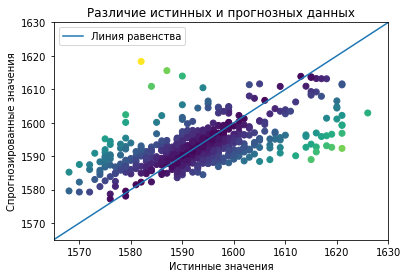

In [23]:
plt.scatter(target_test, predictions, c=(abs(predictions-target_test)))
plt.plot([1550,1650], [1550, 1650], label='Линия равенства')
plt.xlim([1565, 1630])
plt.ylim([1565, 1630])
plt.xlabel('Истинные значения')
plt.ylabel('Спрогнозированные значения')
plt.title('Различие истинных и прогнозных данных')
plt.legend()
plt.show()

### Важность параметров

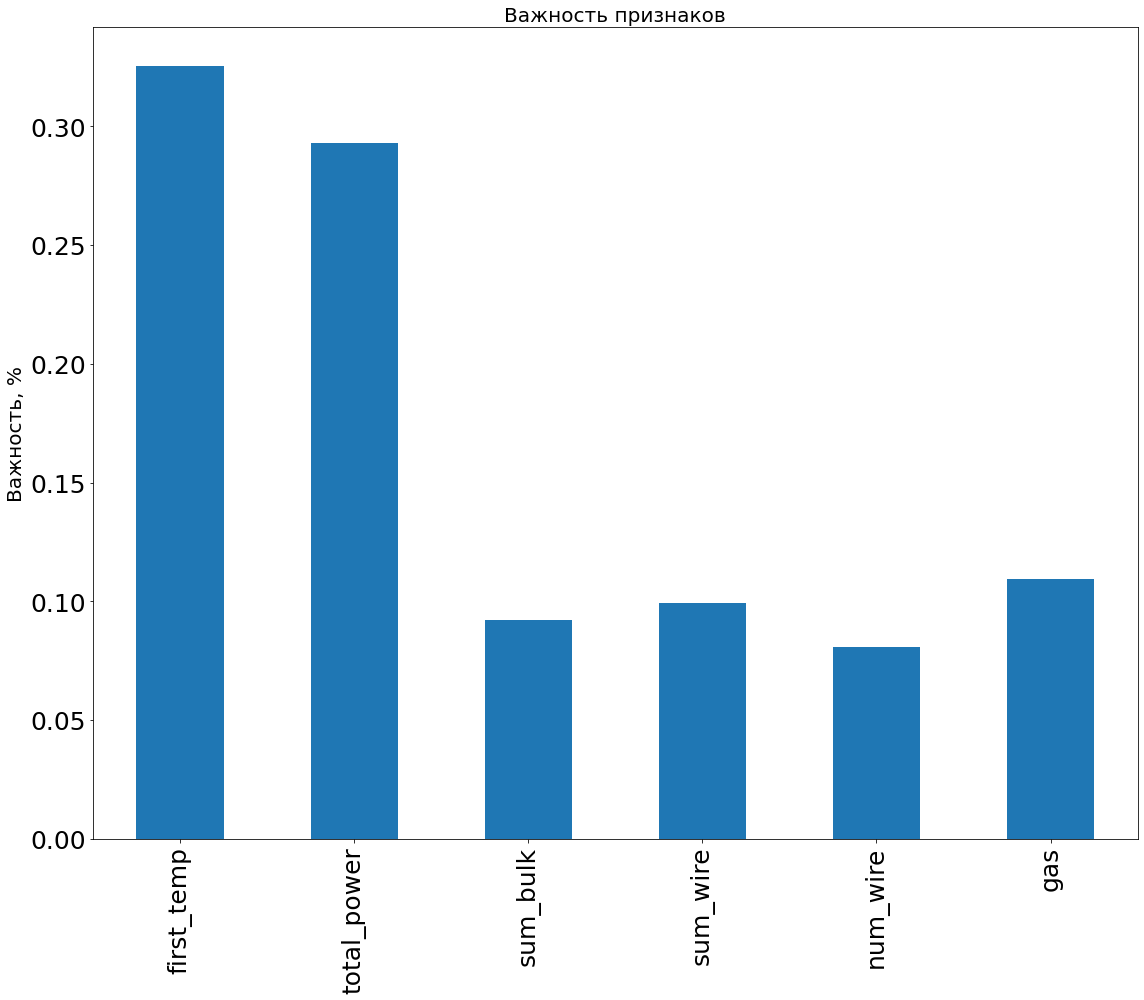

In [24]:
# для CatBoost функция best_estimator_ get_feature_importance()
importance = pd.Series(grid_rf.best_estimator_.feature_importances_,
                         features_train.columns)
fig, ax = plt.subplots(figsize=(16,14))
importance.plot.bar(ax=ax, fontsize=25)
ax.set_title("Важность признаков", size = 20.0)
ax.set_ylabel('Важность, %', fontsize = 20.0)
fig.tight_layout()

## Итоги  
Обучена и протестирована `CatBoost` модель с метрикой на тестовых данных: **MAE** = 6.22. Это означает, что в среднем модель ошибается не более, чем на 6 с четвертью градусов. При этом предсказание средней температурой имеет точность MAE = 7.65, т.е. модель даёт более градуса преемущества.       

Также, заметно, что модель ошибается примерно одинаково как для относительно высоких и низких истинных температур. 

Заметно, что наиболее важные параметры связаны с мощностью нагрева и начальной температурой. Остальные параметры связанные с добавлением метариалов или перемешиванием газом - играют меньшую роль.  
По мимо обученной модели, можно обсудить с заказчиком несколько характеристик процесса:  
- Процент успешных замеров температуры не 100%. В итоговых файлах достаточно много пропущенных значений замеров, жалетельной найти источник ошибки, особенно важно если он возникает на этапе процесса плавления.   
- В разделе <span><a href="#Рассмотрим-&quot;жизненный-цикл&quot;-key" data-toc-modified-id="Рассмотрим-&quot;жизненный-цикл&quot;-key-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Рассмотрим "жизненный цикл" key</a></span> заметно, что нет четкой зависимости температуры от других процессов. Вероятно, здесь скрыта возможность для оптимизации.   
- В разделе [Вариации температур](#diff_tech) заметно, что некоторые сплавы приходят с повышенной температурой и явно перегреваются - нужно выяснять почему, возможно удасться оптимизировать


## Отчёт

### Аннотация 
В работе выбирается и обучается модель прогнозирования конечной температуры сплава. Модель требуется для оптимизации энергозатрат на внепечном этапе производства стали.  
Результирующая модель `CatBoost` показывает метрику MAE = 6.2.

### Введение  
**Задача** - оптимизация потребления энергии второго "внепечного" этапа с помощью регулирования целевой температуры в ковше для сталилетейного завода.
*Процесс* "внепечного" этапа. В печи-ковше расплавленный металл продувается газом для перемешивания, добавляются сыпучие составы и проволоки разных составо для достижения требуемого химического состава. При необходимости состав нагревают.   
Температуру измеряют: 
- перед первым добовлением легирующих добавок 
- после добавления, перемешивания и продувания сплава инертным газом  
Цикл повторяется до достижения целевых показателей состава.

Ключевым фактором является температура металла на финальной стадии, когда химичесикй состав достигает требуемого, после чего металл разливается в слябы.  

Для решения задачи заказчик просит создать модель со средней абсолютной ошибкой менее 7, чтобы в случае большого различия предсказанной температуры и фактической можно было бы говорить о перепотреблении энергии.   

Подбор модели представлял из себя обучения моделей `LinearRegression`,`RandomForestRegressor`,`CatBoost`, подбора гиперпараметром методом `GridSearchCV` для последних двух моделей с кросс-валидацией `cv=5`.  
Качество лучшей модели оценивалась на тестовой выборке. 

### Данные  
Данные предоставлены заказчиком ввиде нескольких таблиц:  
- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).  
Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки. Структура данных такова, что пропусков в данных много - однако, они в таблицах `df_bulk`, `df_bulk_time`, `df_wire`, `df_wire_time`  означают отсутствие этого компонента, поэтому в рабочих таблицах пропуски будут заменены на 0. 

### Признаки    
#### Производственный цикл   
Производственный цикл состоит из итераций нагрева, добавления порошоков и проволоки и добавления газа. Пример, типичного протекания процесса (к сожалению данных о времени добавления газа нет): 

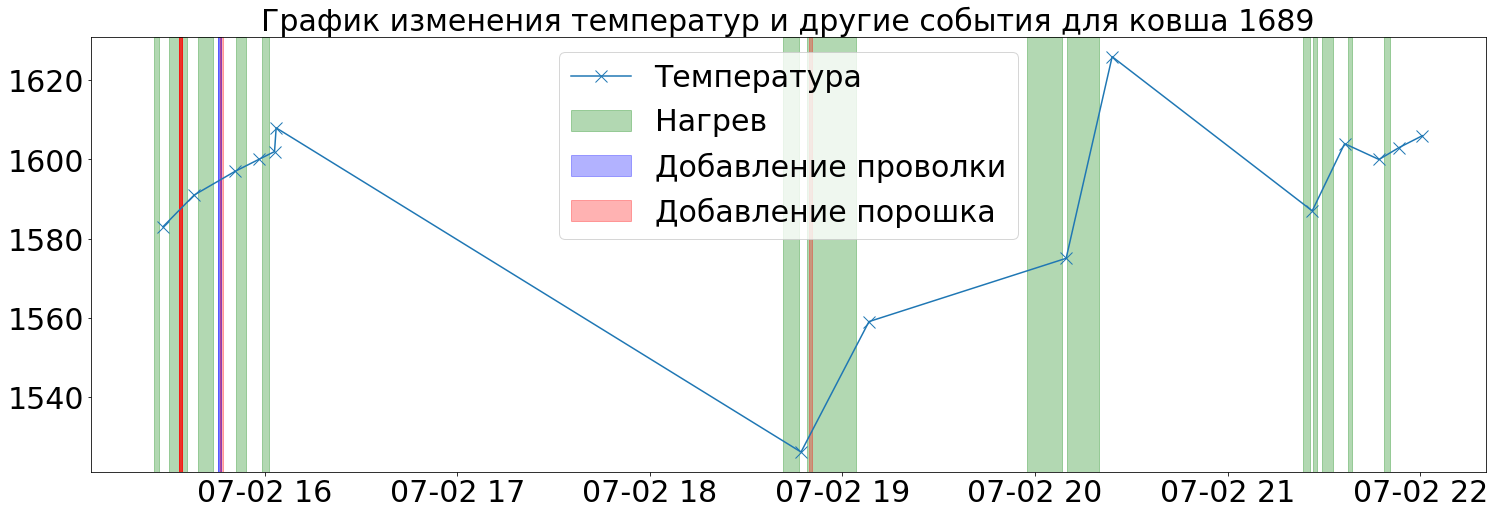

Интересно, что коллебания температуры могут быть существенными, а итераций нагрева осуществляется от 1 до 16, в среднем 4.7. Добовляют порошки от 1 до 7 раз, в среднем 3.6 добавлений, при этом проволоку подают от 1 до 5 раз, в среднем 1.4.   
Это говорит о сиущественной вариативности процесса и большой роли оператора процесса.  
Однако, анализ производственного цикла позволяет выделить важные параметры, влияющией на финальную температуру.

#### Диапозоны температур  
`df_temp` имеет данные об измеренных температурах. В ней есть большое количество пропусков значений температур - 18.2%.
Распределение температур и количество замеров:

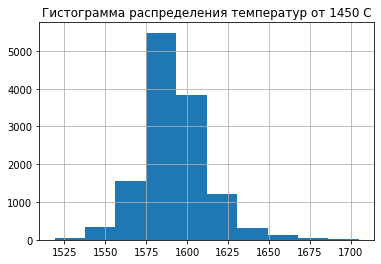  
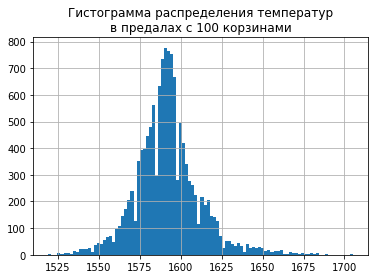  
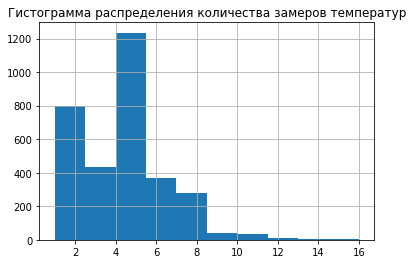

По гистограмме всех измеренных температур сложно сказать, является ли распределение нормальным, а соответсвтенно, сложно сказать о вылетах в данных.  
Однако, заметно, что наиболее часто замеры попадают в диапазон 1575 - 1600, количество измерений "теплее" больше, чем "холоднее", а количество измерений чаще всего 5 или  2, редко больше 12.   
Рассмотрим как выглядит соотношение начальных и конечных температур: 

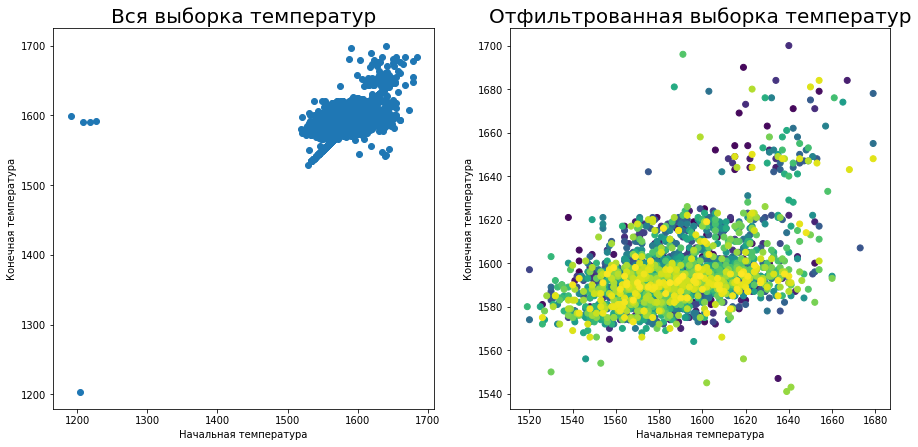

Заметно, что большая часть "истинных" температур лежит в промежутке между 1560 и 1640 градусов. Второй большой кластер находится между 1640 и 1700 градусов. Инетерсно, что во втором кластере начальные температуры существенно выше, конечных - это может говорить о **существенно другом технологическом процессе**, вероятно, здесь кроется возможность для оптимизации энергопотребления.

Интересно, так же, что облако не симметрично и существенно больше растянуто по начальным температурам - возможно, предыдущий технологический процесс имеет большой разброс, вероятно, имеется потенциал для оптимизации.   
Требуется удалить, данные в которых меньше 2х измерений температуры, температуры меньше плавления сплава (1450), а также вылеты из других показателей (отрицательное напряжение и газ больше 50)

#### Таблица параметров      
Признаки находятся в разных таблицах, очевидно, что в свобдную таблицу должны быть помещены:  
- индентификатор ковша `key` из таблицы `data_temp`
- температура, замеренная последней (**целевой показатель**) из таблицы `data_temp`
- температура, замеренная первой  из таблицы `data_temp`
- Общая мощность из таблицы `data_arc`. Суммарная мощность затраченная на разогрев (сумма квадратных корней из суммы квадратов активной и реактивной мощностей)  
- количество итераций прогрева из таблицы `data_arc`
- количество итераций добавления сыпучих  из таблицы `data_bulk`
- сумма добавленной массы проволоки по всем составам из таблицы `data_wire` 
- количество итераций добавления проволоки из таблицы `data_wire`
- подача газа (объём) из таблицы `data_gas`

Данные объединяются по параметру `key` методом *слева* в качестве базовой таблицы выступает `data_temp`. 
В результате будут полученны:  
`df`- основная таблица со всеми данными, без пропусков данных.  
Рассмотрим распределение парамтеров:

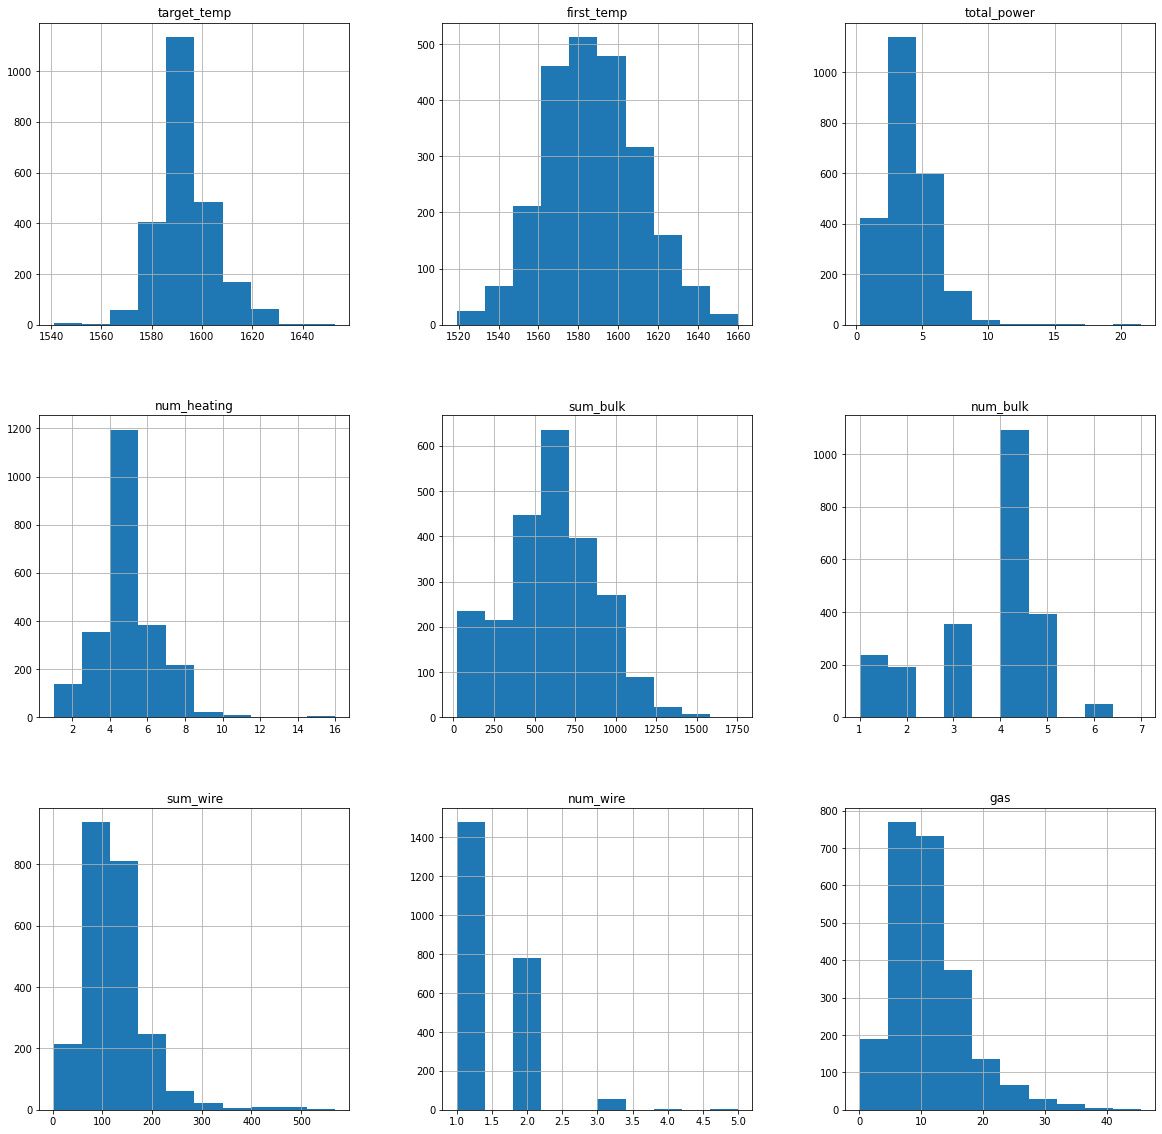

Статестический тест на нормальнео распределение, показывает:  
- Распределение target_temp НЕ близко к нормальному
- Распределение first_temp НЕ близко к нормальному
- Распределение total_power НЕ близко к нормальному
- Распределение num_heating НЕ близко к нормальному
- Распределение sum_bulk НЕ близко к нормальному
- Распределение num_bulk НЕ близко к нормальному
- Распределение sum_wire НЕ близко к нормальному
- Распределение num_wire НЕ близко к нормальному
- Распределение gas НЕ близко к нормальному   


#### Матрица корреляций
Учитывая не нормальное распределение проверка на мультиколлинеарность проводится по методу Спирмена.  
Карта корреляции:

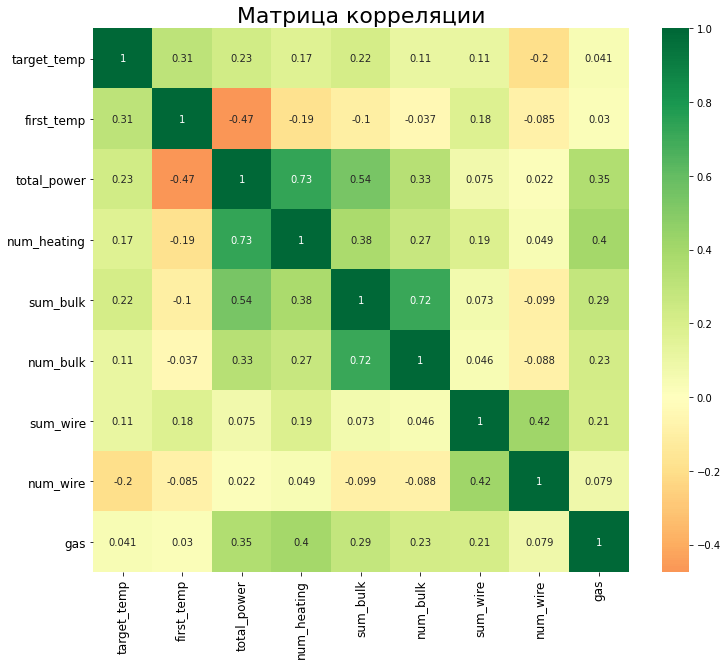

Абсолютно логично, что показатели мощности мультиколлениарны (`num_heating`).
На карте заметно корреляции `sum_bulk` и `num_bulk` - суммы общего количества добавленного материала и количество итераций добавлений. Причем, схожие параметры для проволоки не коррелируют. Желательно, обсудить с заказчиком специфику добавление проволоки.   
В итоговой таблице уберём `num_heating`, `num_bulk`.

### Обучение моделей

Будут рассмотрены несколько моделей, чтобы в продакт выбрать лучшую:  
- думми-модель, заполняющая средним значением. Модель нужна, чтобы оценивать адекватеность других моделей  
- линейная регрессия с кросс-валидацией  
- случайный лес с поиском гиперпараметров с помощью GridSearch  
- Catboost  
Для выбора наилучшей модели будет использоваться метрика, выбранная заказчиком - **MAE**. 

#### Думми-модель  
Для проверки моделей на базовое качество нужно найти граничную метрику. В таком качестве выступает прогноз по среднему значению тренировочной выборки.  
Бенчмарк получился **MAE = 7.65**

#### Линейная регрессия  
Линейная регрессия обучается подбирая вектор весов, который при умножении на вектор признаков и прибалвляя параметр сдвиг, стремится уменьшить метрику МАЕ.   
Для повышения качества моделей используется *кросс-валидация* - разбиение обучающей выборки на тренировочную и тестовую части, добавляя итерации подбора лучших коэффициентов (вектора весов).  
На тренировочной выборке при кросс-валидации на 5 батчей метрика **МАЕ = 6.7878**

#### Случайный лес  
Случайный лес - это ансамбыль деревьев решений. Подбор гиперпараметров осуществялся с помощь метода `GridSearchCV` с перебором количетсва деревьем и их глубины, при оценке кросс-валидацией.   
Лучшие подобранные параметры: {'max_depth': 9, 'n_estimators': 71} выдают на тренировочной базе **МАЕ = 6.55**.

#### CatBoost  
Библиотека для градиентного бустинга, основанная на решаюших деревьях.   
Подбор гиперпараметров осуществялся с помощь метода GridSearchCV с перебором количетсва деревьем и их глубины, при оценке кросс-валидацией.   
Лучшие подобранные параметры: {'depth': 3, 'has_time': True, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_state': 261222} на тренировочной выборке показывает **МАЕ = 6.53**. 

`CatBoost` буквально на 2 сотые лучше Случайного леса. В общем, модели показывают метрику примерно на один градус лучше предсказания средним.   
`CatBoost` отклоняется от истинного значения в среднем на 6.5 градусов.

### Финальная модель  
Метрика МАЕ на тестовой выборке для лучшей модели: **МАЕ = 6.22** Таким, образом требуемая точность достигнута - модель ошибается в среднем не более чем на 6.3 градуса.   
Причем, отличия от истинного значения распространнены практически равномерно, с наибольшими неточностями на высоких истинных значениях. 

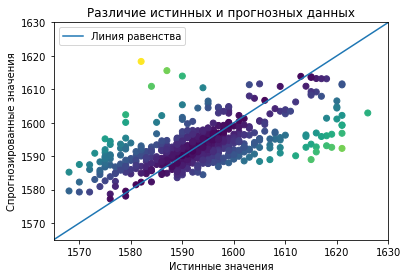

Анализ влияния признаков указывает - что наиболее важные это изначальная температура и мощность. 

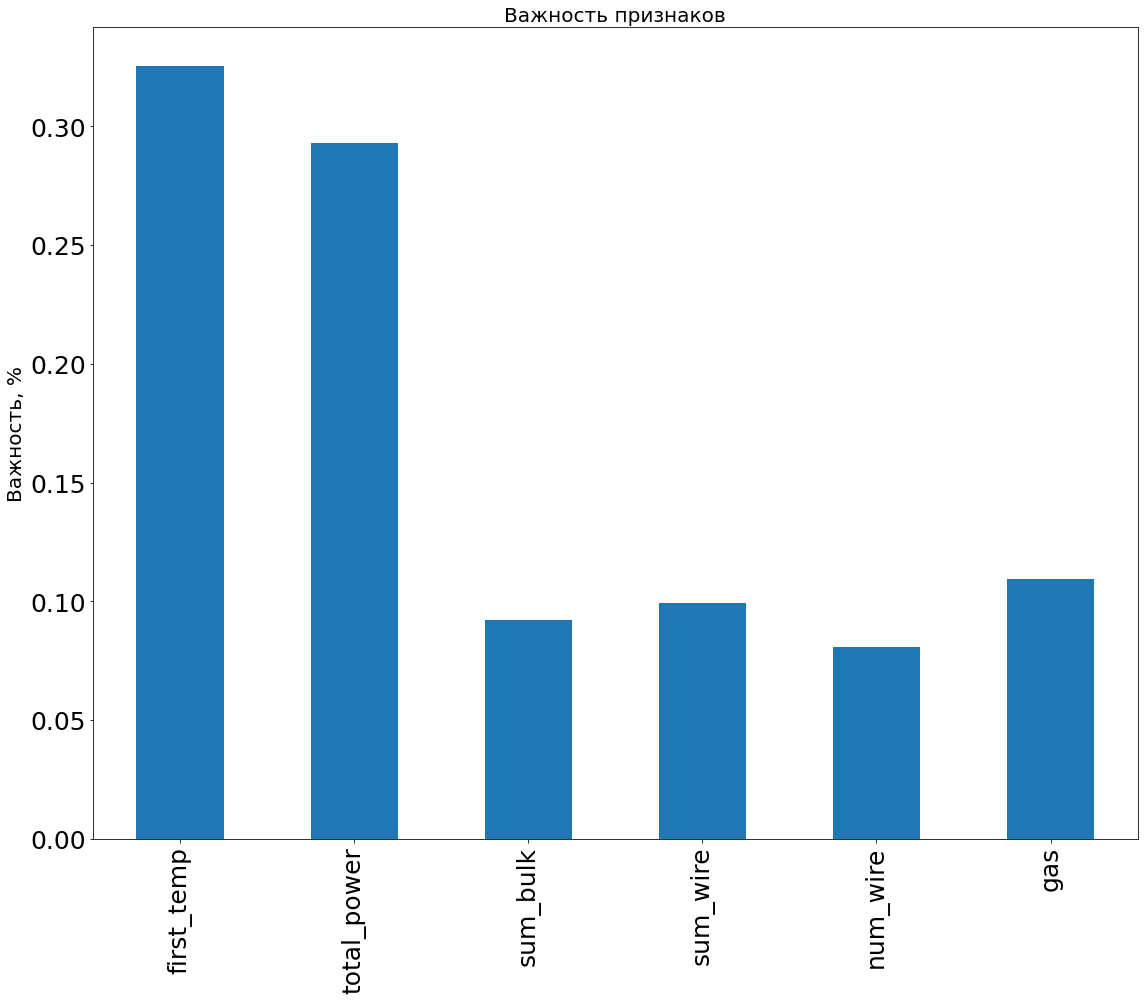

### Вывод  & ответы на ноушен
Модель позволяет предсказывать температуры в завершении этапа производства. Однако, не очевидно, как соотносится кончная температура и температуры из середины технологического процесса - в момент добавления, перемешивания и изменения химического состава.   

Также, кажется, что процесс можно оптимизировать по энергии, если учесть фазовые диаграммы и начальную температуру сплава. Заметно, что иногда расплав приходит перегретым, относительно большинства, нужно совместно с заказчиком проработать и выявить причины. 

Модель можно имеет потенциал для улучшения - расчет общей затраченной на нагрев энергии, а не мощности.    


- *Какие пункты плана были выполнены, а какие — нет (поясните почему)?*
В результате работы не были вынесены максимальные и минимальные температуры (таблица получалась перегруженной и выловить ошибки было очень сложно), в целом сводную таблицу пришлось упростить. 

- *Какие трудности возникли и как вы их преодолели?*   
Из-за перегруженной сводной таблицы сначала получались очень высокие МАЕ (9.8 и больше). Оценка важности признаков была не очень адекватной - наиболее важным признаком становилась количество итераций прогрева. Проблему обнаружить не удалось, пришлось переписывать сводную таблицу с меньшим количеством полей. 
Вторая проблема была связана с различием `GridSearchCV.best_score_`, `GridSearchCV.scores`. Во втром случае лучше получалась модель ансамблей деревьев с очень низкой метрикой (МАЕ около 4.5). Исправлено после замечания тимлида. 

- *Какие ключевые шаги в решении задачи выделили?* 
Подбор признаков и анализ данных - первое очевидно, второе показывает понять процесс и что конкретно показывает модель.
- *Какая ваша итоговая модель и какое у неё качество?*  
Модель `CatBoost` с параметрами  {'depth': 3, 'has_time': True, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_state': 261222} и метрикой МАЕ = 6.53 на тренировочной и МАЕ = 6.22 на тестовой выборке. 